In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read the records from orders sheet

df_orders = pd.read_excel('/content/Amazon_Orders.xlsx',sheet_name='Orders')
df_customers = pd.read_excel('/content/Amazon_Orders.xlsx',sheet_name='Customers')
df_sales_targets = pd.read_excel('/content/Amazon_Orders.xlsx',sheet_name='Sales Targets')


df_orders.head()

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545


# Which Order Source is used most often ? (Count plot)

Order Source
Website     637
Whatsapp    633
App         622
Other       591
Name: count, dtype: int64
Index(['Website', 'Whatsapp', 'App', 'Other'], dtype='object', name='Order Source')
________________________________________


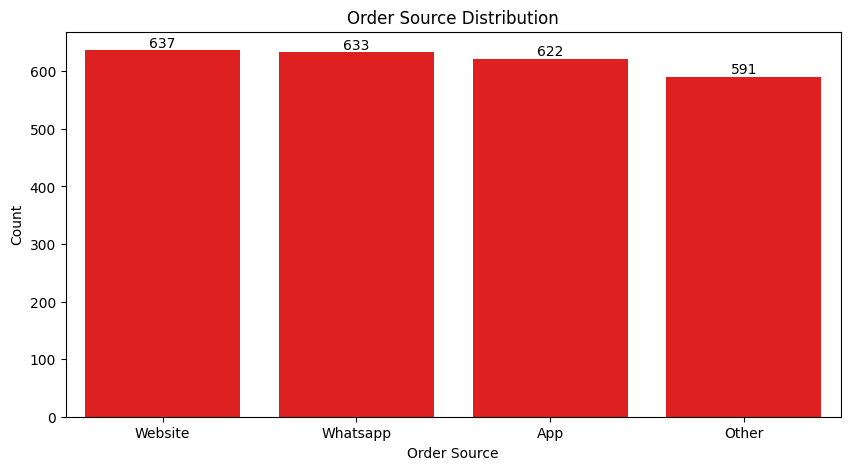

In [6]:
order_counts = df_orders['Order Source'].value_counts()

print(order_counts)
print(order_counts.index)
print("__"*20)

# Build the plot
plt.figure(figsize=(10,5))

order = order_counts.index
ax = sns.countplot(data=df_orders,
                   x='Order Source',
                   order=order,
                   color= 'Red')

ax.bar_label(ax.containers[0])

plt.title('Order Source Distribution')
plt.xlabel('Order Source')
plt.ylabel('Count')
plt.show()

In [7]:
df_sales_targets.head()

,Sales POC,Sales Manager First Name,Sales Manager Last Name,Sales Team,2023 Sales Target
0,Kalle Suominen,Amelia,Johnson,Epsilon,100000
1,Julie Brown,Lukas,Schmidt,Alpha,200000
2,Jeff Young,Olivia,Jensen,Beta,200000
3,Kyung Yu,Sofia,Laine,Gamma,100000
4,Adrian Huxley,Chloe,Dupont,Beta,200000


#Which 5 sales reps had the highest sales targets ?

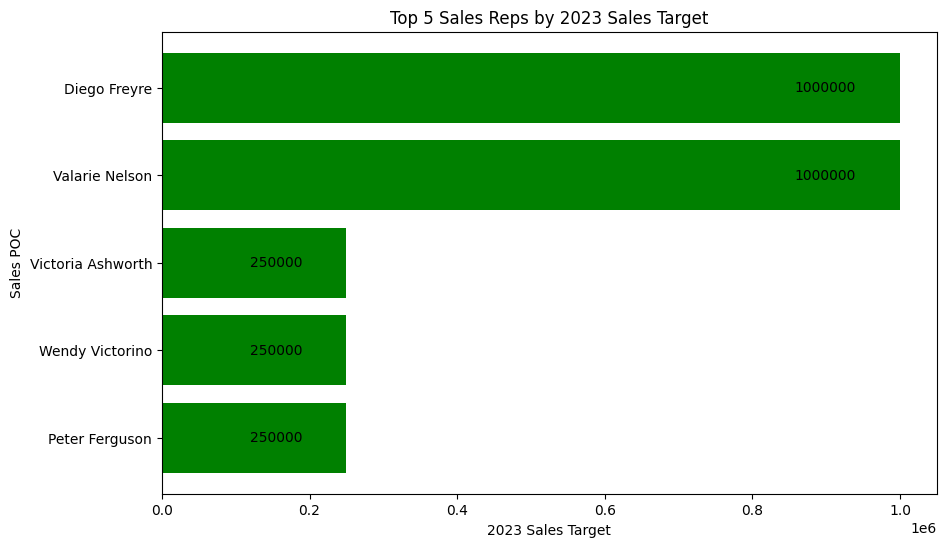

In [8]:
# Get the top 5 sales reps by SALES target
top_targets = df_sales_targets[['Sales POC','2023 Sales Target']].sort_values(by='2023 Sales Target',
                                                                              ascending=False).head(5)

# plot
plt.figure(figsize=(10,6))

# to be represented as a horizontal bar plot
# barh : horizontal bar plot
plt.barh(top_targets['Sales POC'], # categorical values go on y-axis
         top_targets['2023 Sales Target'], # numerical values go on x-axis
         color='green')

# add value labels inside the bars
for index, value in enumerate(top_targets['2023 Sales Target']):
    plt.text(value - 60000, index, str(value) , va='center', ha='right')


plt.title('Top 5 Sales Reps by 2023 Sales Target')
plt.xlabel('2023 Sales Target')
plt.ylabel('Sales POC')
plt.gca().invert_yaxis()
plt.show()

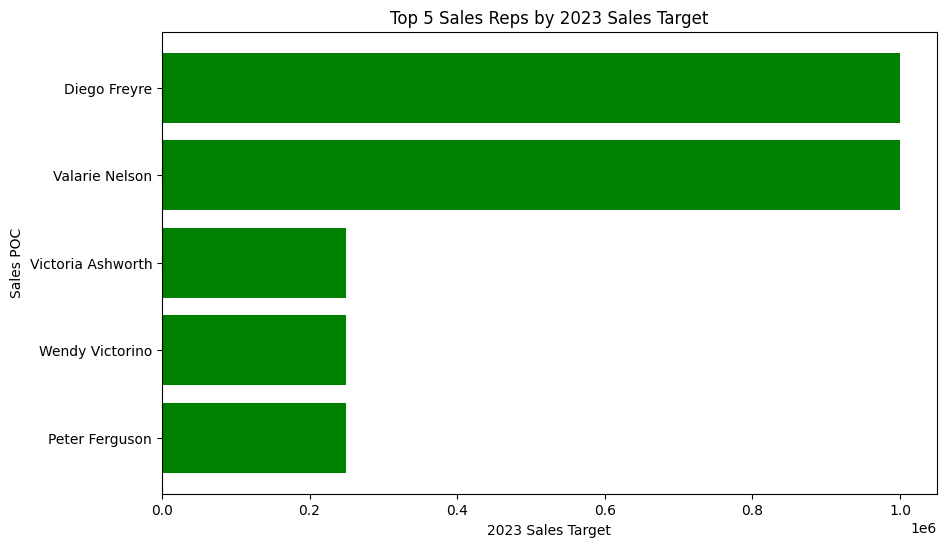

In [9]:



# plot
plt.figure(figsize=(10,6))

# to be represented as a horizontal bar plot
# barh : horizontal bar plot
plt.barh(top_targets['Sales POC'],
         top_targets['2023 Sales Target'],
         color='green')


plt.title('Top 5 Sales Reps by 2023 Sales Target')
plt.xlabel('2023 Sales Target')
plt.ylabel('Sales POC')
plt.gca().invert_yaxis()
plt.show()
